# Task1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
y = np.load('y_values.npy')
x = np.load('x_values.npy')

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show(block=False)



<Figure size 640x480 with 1 Axes>

In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg1 = reg.fit(x, y)

In [81]:
yy=np.load('test_x_values.npy')
y_pred=reg.predict(yy)

Text(0.5, 1.0, ' Linear Regression ')

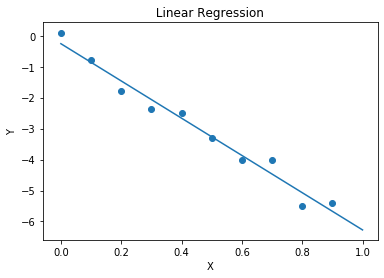

In [82]:

plt.scatter(x, y)
plt.plot(yy,y_pred)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(' Linear Regression ')


# Task2

(178, 13)
(178,)


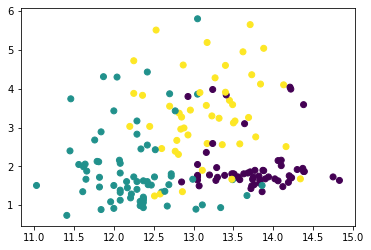

In [89]:
D=np.load('wineData.npy')
L=np.load('wineLabels.npy')

print(D.shape)
print(L.shape)

plt.scatter(D[:, 0], D[:, 1], c=L)



Train labels:
[1 1 0 1 0 1 1 2 2 0 0 0 2 2 0 2 0 1 0 1 0 1 2 1 0 1 2 0 1 1 0 1 2 2 2 2 1
 0 0 2 1 2 0 1 1 1 1 0 1 2 2 2 1 1 0 0 2 1 0 2 2 1 1 1 2 1 1 0 2 0 0 0 2 0
 1 1 0 1 1 1 1 2 1 0 2 2 1 1 0 2 2 1 1 1 0 1 0 0 2 2 0 1 1 1 2 1 1 0 1 0 2
 0 0 0 1 0 0 2 1 2 0 0 0 1 1 1 0 1 0 0 2 0 2 1 1 2 2 2 1 2 1 1]
Test labels:
[0 2 1 0 0 0 2 2 2 0 0 1 0 1 0 1 0 0 1 2 1 2 0 1 1 0 1 1 0 1 1 1 0 2 2 2]
Train labels:
[[1.200e+01 9.200e-01 2.000e+00 ... 1.380e+00 3.120e+00 2.780e+02]
 [1.237e+01 1.170e+00 1.920e+00 ... 1.120e+00 3.480e+00 5.100e+02]
 [1.371e+01 1.860e+00 2.360e+00 ... 1.110e+00 4.000e+00 1.035e+03]
 ...
 [1.251e+01 1.240e+00 2.250e+00 ... 7.500e-01 1.510e+00 6.500e+02]
 [1.146e+01 3.740e+00 1.820e+00 ... 7.500e-01 2.810e+00 5.620e+02]
 [1.334e+01 9.400e-01 2.360e+00 ... 1.020e+00 1.930e+00 7.500e+02]]
Test labels:
[[1.341000e+01 3.840000e+00 2.120000e+00 1.880000e+01 9.000000e+01
  2.450000e+00 2.680000e+00 2.700000e-01 1.480000e+00 4.280000e+00
  9.100000e-01 3.000000e+00 1.035000e+03]

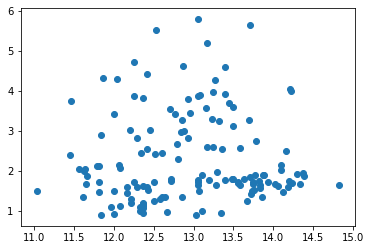

In [90]:
from sklearn.model_selection import train_test_split
D_train, D_test, L_train, L_test = train_test_split(D, L, train_size=0.80 ,test_size=0.20)
                                                    
print(f"Train labels:\n{L_train}")
print(f"Test labels:\n{L_test}")
print(f"Train labels:\n{D_train}")
print(f"Test labels:\n{D_test}")
                                                    

plt.scatter(D_train[:,0],D_train[:,1])


In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)


pca.fit(D_train)
D_pca = pca.transform(D_train)
D_pca1 = pca.transform(D_test)





In [92]:
D_pca.shape


(142, 2)

Text(0.5, 1.0, ' wine dataset in original feature space ')

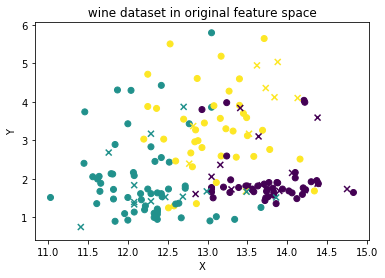

In [93]:

plt.scatter(D_train[:, 0], D_train[:, 1], c=L_train)
plt.scatter(D_test[:, 0], D_test[:, 1],marker = 'x', c=L_test)



plt.xlabel('X')
plt.ylabel('Y')
plt.title(' wine dataset in original feature space ')


Text(0.5, 1.0, ' wine dataset in Principle Component space ')

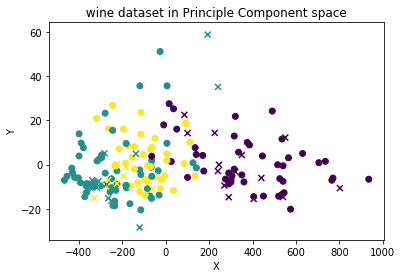

In [94]:
plt.scatter(D_pca[:, 0], D_pca[:, 1], c=L_train)
plt.scatter(D_pca1[:, 0], D_pca1[:, 1],marker = 'x', c=L_test)

plt.xlabel('X')
plt.ylabel('Y')
plt.title(' wine dataset in Principle Component space ')


# Task3


In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

model.fit(D_train, L_train)

M_train = model.transform(D_train)
M_test = model.transform(D_test)

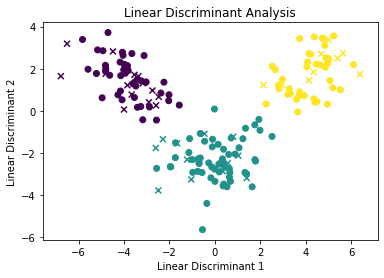

In [96]:
plt.figure()
plt.scatter(M_train[:, 0], M_train[:, 1], c=L_train, marker='o')
plt.scatter(M_test[:, 0], M_test[:, 1], c=L_test, marker='x')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('Linear Discriminant Analysis')
plt.show(block=False)

# Task4

In [139]:
#load data
D=np.load('wineData.npy')
L=np.load('wineLabels.npy')

print(D.shape)
print(L.shape)

from sklearn.model_selection import train_test_split
D_train, D_test, L_train, L_test = train_test_split(D, L, train_size=0.8 ,test_size=0.2)


(178, 13)
(178,)


In [146]:
np.mean(D_train)

70.2559024913326

In [147]:
#calculate mean of X i.e given training data
mean_of_x = np.mean(D_train)
#calculate mean center data
centredtraindata = D_train-mean_of_x
#calculate U,S,Vh
u ,s,vh = np.linalg.svd(centredtraindata)
vh.shape,centredtraindata.shape


((13, 13), (142, 13))

In [161]:
projectionmatrix = vh[:,:10]
#project train data on calculated
projectedtraindata = np.matmul(centredtraindata ,(projectionmatrix))


In [164]:
#center testing data using training mean
centredtestdata = D_test-mean_of_x
projectionmatrix = vh[:,:10]
#project test data on calculated
projectedtestdata = np.matmul(centredtestdata ,(projectionmatrix))

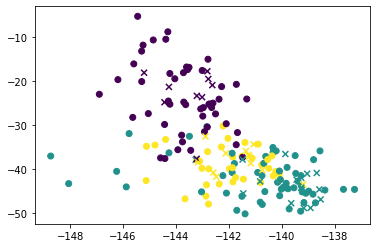

In [166]:
plt.figure()
plt.scatter(projectedtraindata[:, 0], projectedtraindata[:, 1],c=L_train)
plt.scatter(projectedtestdata[:, 0], projectedtestdata[:, 1], marker='x',c=L_test)
plt.show(block=True)